# Ovarian cancer data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('GSE18520.csv')

C:\Users\prash\AppData\Local\Temp\ipykernel_3488\216512606.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('GSE18520.csv')


In [15]:
df.head()

,GENE,GSM461348,GSM461349,GSM461350,GSM461351,GSM461352,GSM461353,GSM461354,GSM461355,GSM461356,...,GSM462643,GSM462644,GSM462645,GSM462646,GSM462647,GSM462648,GSM462649,GSM462650,GSM462651,GSM462652
0,group,serous,serous,serous,serous,serous,serous,serous,serous,serous,...,control,control,control,control,control,control,control,control,control,control
1,DDR1,5362.04,1998.56,1198.56,4773.05,3512.54,1956.38,6097.4,2449.74,1477.7,...,869.705,1573.5,895.644,1019.53,2106.86,2764.01,2027.65,2175.86,3073.06,2748.27
2,RFC2,309.085,223.619,255.617,311.391,261.382,250.646,186.88,287.35,274.902,...,634.568,767.856,537.466,590.129,224.665,140.162,154.077,240.65,170.265,206.474
3,HSPA6,167.941,154.186,213.864,176.065,153.716,169.089,169.373,194.446,168.071,...,527.915,286.869,297.528,295.24,97.6766,71.0357,116.246,85.5578,106.737,74.3232
4,PAX8,3018.71,2635.01,1777.83,4241.07,2450.09,2050.59,2640.27,2906.28,1625.22,...,579.585,584.242,854.654,574.547,353.336,661.082,549.585,378.661,302.176,389.142


In [16]:
df.shape

(44541, 64)

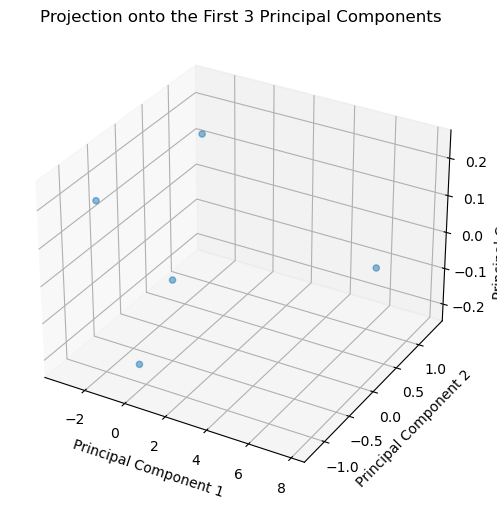

In [17]:


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data)

# Create a three-dimensional scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the projections onto the first three principal components
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], marker='o', alpha=0.5)


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.set_title('Projection onto the First 3 Principal Components')

plt.show()


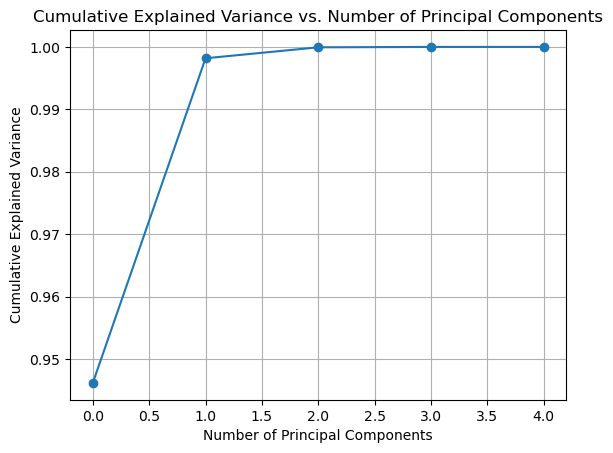

Percentage of variance lost in 3 dimensions: 0.01%
Number of dimensions needed to keep 95% variance: 2


In [21]:
# TASK 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



minimum_comp = min(data.shape[0], data.shape[1])

# Performing PCA
pca = PCA(n_components=minimum_comp)
pca.fit(data)

# Calculating cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Calculate the percentage of variance lost with 3 dimensions
variance_lost_3d = 1 - cumulative_variance_ratio[2]

# Find the number of dimensions needed to keep 95% variance
num_dimensions_95_percent = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Percentage of variance lost in 3 dimensions: {variance_lost_3d * 100:.2f}%")
print(f"Number of dimensions needed to keep 95% variance: {num_dimensions_95_percent}")
